In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [151]:
df=pd.read_csv('/content/anxiety_attack_dataset.csv')

In [152]:
df

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,Female,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,Female,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,Male,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


#***EDA(Explotary Data Analysis):-***

In [153]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [154]:
#check the null values rows
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0


In [155]:
#check the duplicated
df.duplicated().sum()

0

In [156]:
#dataset describe
df.describe()

,ID,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Severity of Anxiety Attack (1-10)
count,12000.00000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,40.96675,6.482650,5.030892,246.696083,9.492833,5.462250,119.398500,25.462333,2.987417,4.518417,5.497333,5.507583
std,3464.24595,13.47328,2.014885,2.889000,144.487071,5.769364,2.897201,34.806711,8.090686,1.414482,2.866010,2.867579,2.858663
min,1.00000,18.00000,3.000000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,3000.75000,29.00000,4.800000,2.500000,122.000000,5.000000,3.000000,89.000000,18.000000,2.000000,2.000000,3.000000,3.000000
50%,6000.50000,41.00000,6.500000,5.000000,244.000000,9.000000,5.000000,119.000000,25.000000,3.000000,5.000000,5.000000,6.000000
75%,9000.25000,53.00000,8.200000,7.525000,371.000000,15.000000,8.000000,149.000000,32.000000,4.000000,7.000000,8.000000,8.000000
max,12000.00000,64.00000,10.000000,10.000000,499.000000,19.000000,10.000000,179.000000,39.000000,5.000000,9.000000,10.000000,10.000000


#***Data Visualization:-***

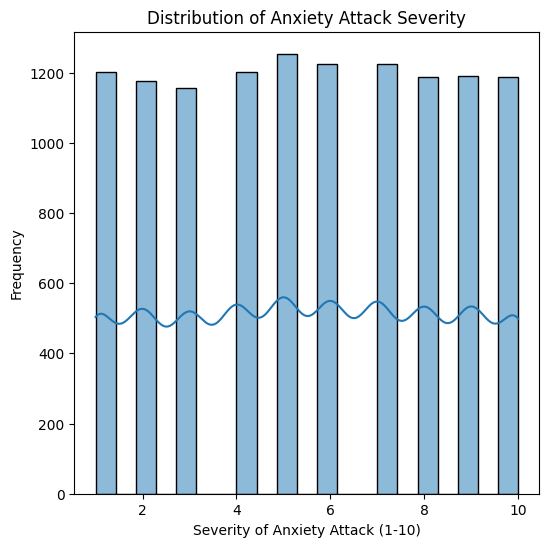

In [157]:
# Visualizations
plt.figure(figsize=(6, 6))
sns.histplot(df["Severity of Anxiety Attack (1-10)"], kde=True)
plt.title("Distribution of Anxiety Attack Severity")
plt.xlabel("Severity of Anxiety Attack (1-10)")
plt.ylabel("Frequency")
plt.show()

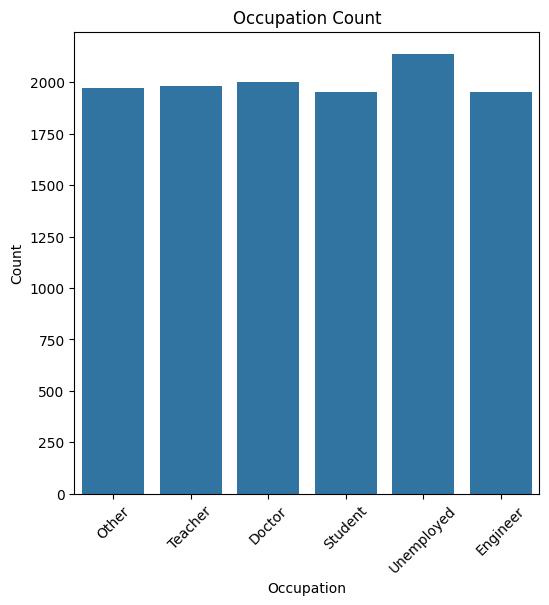

In [158]:
#occupation cout bar chart
plt.figure(figsize=(6, 6))
sns.countplot(x='Occupation', data=df)
plt.title("Occupation Count")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

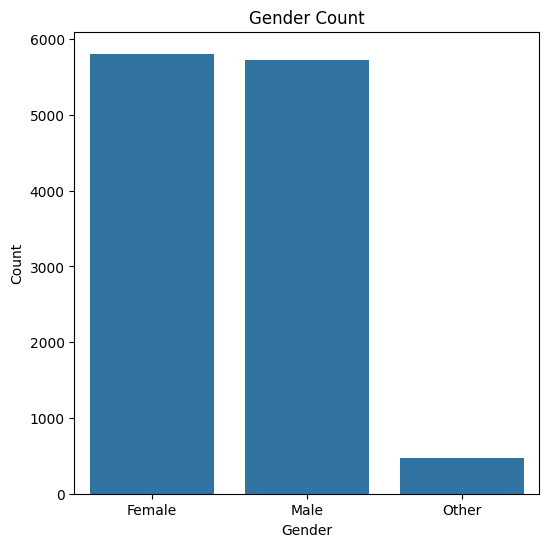

In [159]:
#Gender column barchart count plot
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=df)
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

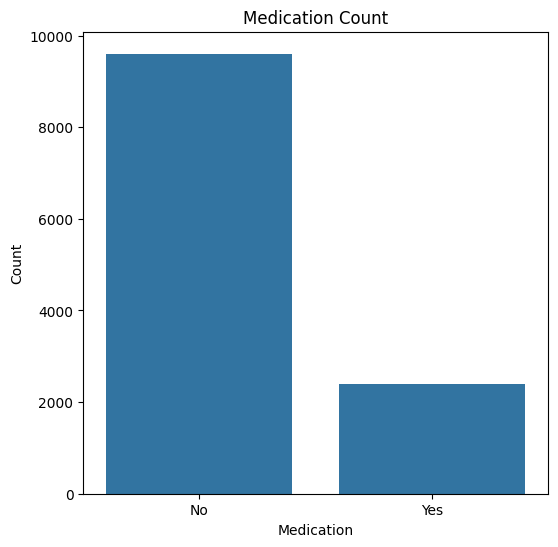

In [160]:
#medication column barchart
plt.figure(figsize=(6,6))
sns.countplot(x='Medication',data=df)
plt.title("Medication Count")
plt.xlabel("Medication")
plt.ylabel("Count")
plt.show()

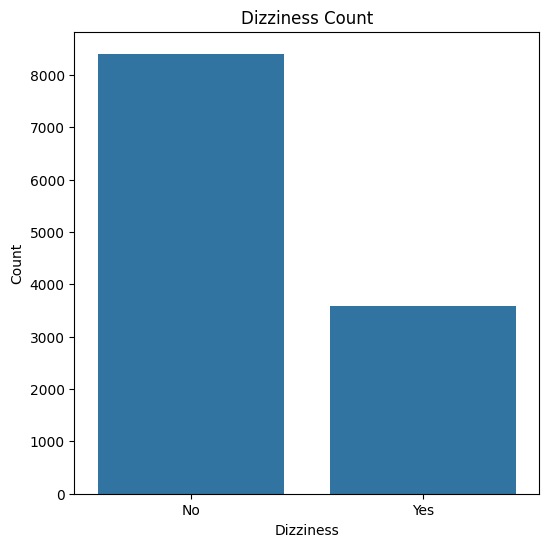

In [161]:
#Dizziness columns
plt.figure(figsize=(6,6))
sns.countplot(x='Dizziness',data=df)
plt.title("Dizziness Count")
plt.xlabel("Dizziness")
plt.ylabel("Count")
plt.show()

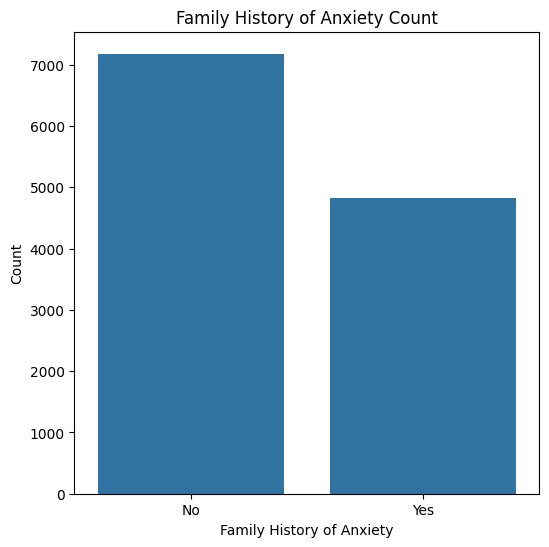

In [162]:
#Family History of Anxiety bar chart
plt.figure(figsize=(6,6))
sns.countplot(x='Family History of Anxiety',data=df)
plt.title("Family History of Anxiety Count")
plt.xlabel("Family History of Anxiety")
plt.ylabel("Count")
plt.show()

In [163]:
#drop the necessay column
df.drop(columns=['ID','Family History of Anxiety'],axis=1,inplace=True)

#***Label Encoding:-***

In [164]:
#create list of categorical column list
categorical_col=df.select_dtypes(include='object').columns
categorical_col

Index(['Gender', 'Occupation', 'Smoking', 'Dizziness', 'Medication',
       'Recent Major Life Event'],
      dtype='object')

In [165]:
#check the uniques in categorical columns
for col in categorical_col:
  print(col)
  print(df[col].unique())

Gender
['Female' 'Male' 'Other']
Occupation
['Other' 'Teacher' 'Doctor' 'Student' 'Unemployed' 'Engineer']
Smoking
['No' 'Yes']
Dizziness
['No' 'Yes']
Medication
['No' 'Yes']
Recent Major Life Event
['Yes' 'No']


In [166]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column
for column in categorical_col:
    df[column] = le.fit_transform(df[column])

#***correlation:-***

In [167]:
df.corr()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
Age,1.000000,-0.003771,0.007812,0.006185,-0.003631,-0.004578,-0.002640,-0.007297,0.013531,-0.020418,0.005677,-0.011038,-0.000506,0.002857,0.007433,-0.020380,0.005687,-0.020083
Gender,-0.003771,1.000000,0.012180,-0.006266,-0.003234,0.000484,0.001957,0.002470,0.001608,0.006873,0.010269,0.000392,0.005945,0.001454,-0.004955,-0.011475,-0.001159,0.011455
Occupation,0.007812,0.012180,1.000000,-0.006401,-0.005828,-0.000604,0.003242,-0.003344,-0.000418,0.012202,-0.017229,0.007177,-0.008386,0.010014,0.001672,0.006107,-0.006899,0.012897
Sleep Hours,0.006185,-0.006266,-0.006401,1.000000,0.003628,0.004978,0.022494,0.016030,0.002934,-0.014090,-0.006555,0.011775,-0.006208,0.004404,0.002203,0.002231,0.004538,-0.003293
Physical Activity (hrs/week),-0.003631,-0.003234,-0.005828,0.003628,1.000000,0.002304,-0.002540,-0.016041,-0.003662,0.009771,-0.008907,0.006183,-0.000902,0.005241,-0.000600,-0.005101,0.001773,0.018012
Caffeine Intake (mg/day),-0.004578,0.000484,-0.000604,0.004978,0.002304,1.000000,-0.008273,0.003113,0.019628,-0.004907,0.007220,-0.006122,0.003611,0.009309,0.003084,-0.006677,0.001861,0.004023
Alcohol Consumption (drinks/week),-0.002640,0.001957,0.003242,0.022494,-0.002540,-0.008273,1.000000,0.008875,0.003372,-0.006033,0.000778,-0.006501,-0.014609,0.007144,-0.002817,-0.004292,0.017564,0.009288
Smoking,-0.007297,0.002470,-0.003344,0.016030,-0.016041,0.003113,0.008875,1.000000,-0.003912,-0.002353,-0.008317,0.010697,-0.018331,-0.001416,0.009373,-0.005765,-0.007808,-0.007751
Stress Level (1-10),0.013531,0.001608,-0.000418,0.002934,-0.003662,0.019628,0.003372,-0.003912,1.000000,-0.008752,-0.009164,-0.016192,0.003433,0.003160,0.014055,0.002086,0.011108,0.003194
Heart Rate (bpm during attack),-0.020418,0.006873,0.012202,-0.014090,0.009771,-0.004907,-0.006033,-0.002353,-0.008752,1.000000,0.001879,-0.007522,-0.017622,-0.004501,0.017687,-0.001329,-0.001068,-0.000312


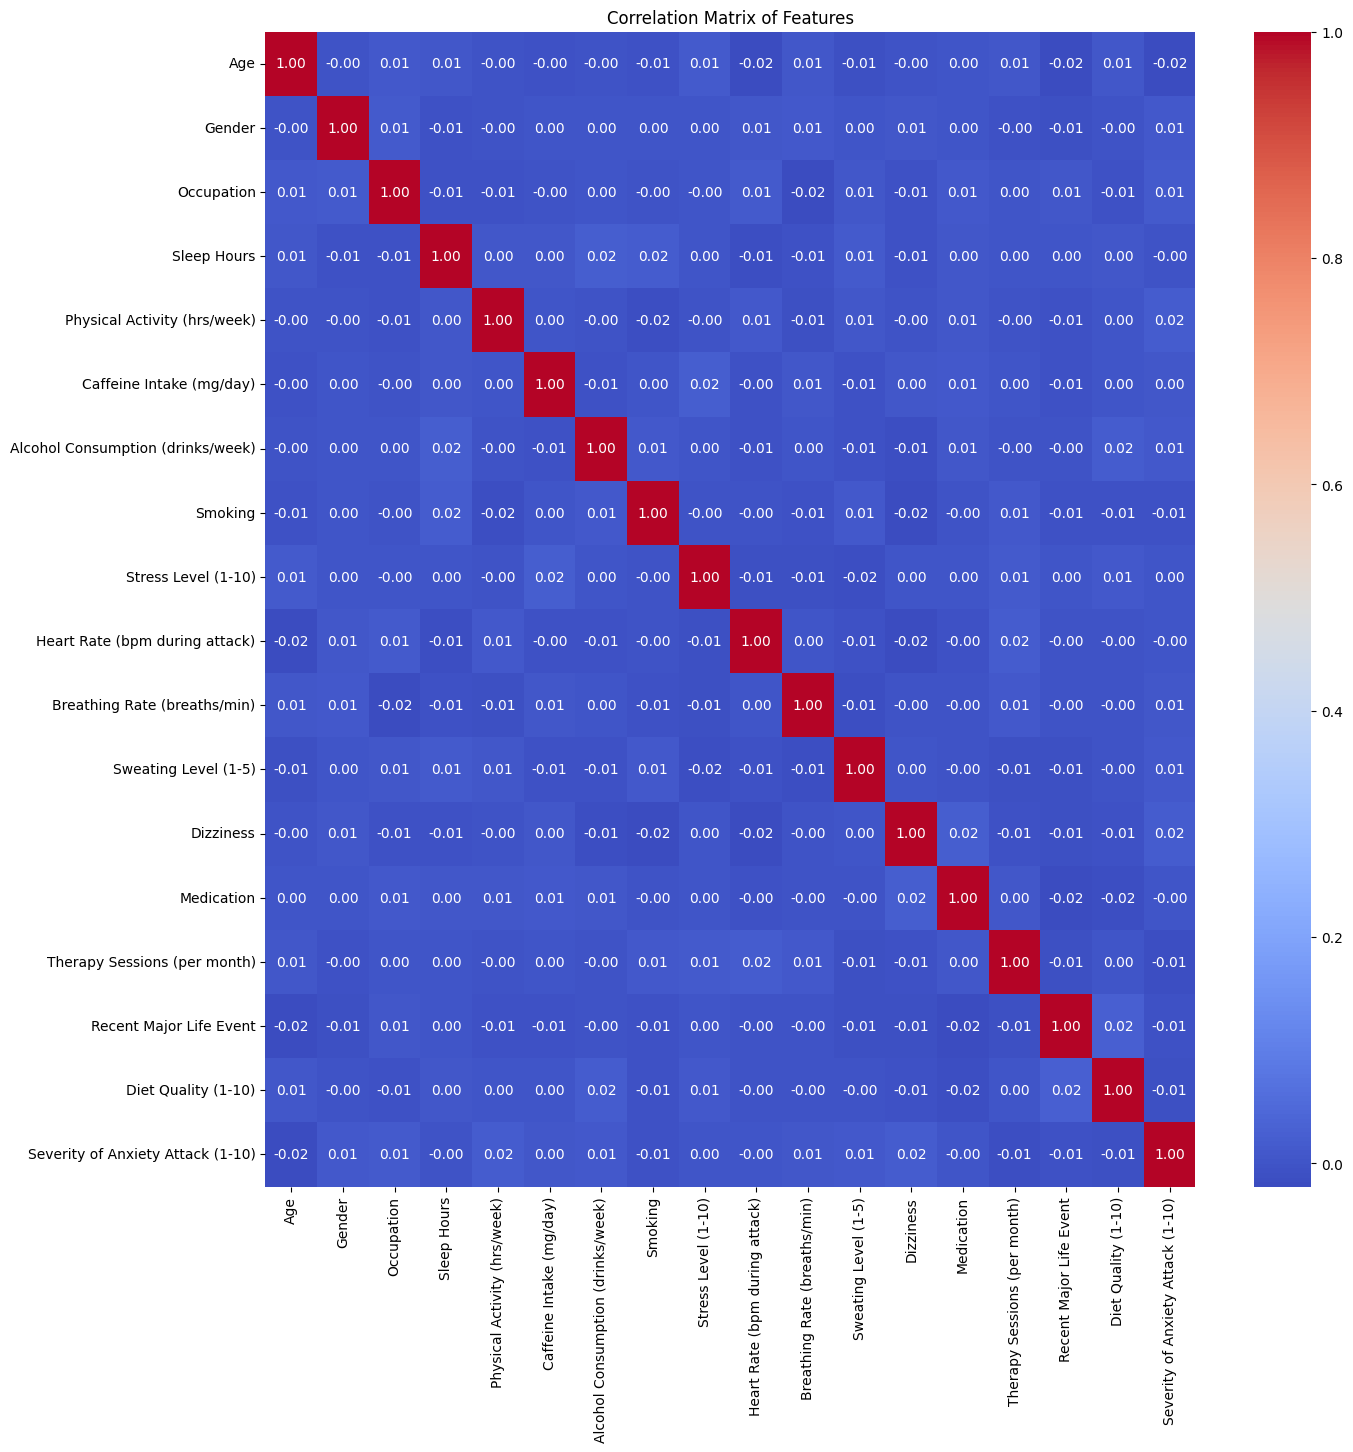

In [168]:
# Plotting the correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()

#***Eliminate Features :-***
According to correlation with target column

In [169]:
# Set threshold
threshold = 0.001

# Compute correlation with target column
correlations = df.corr()['Severity of Anxiety Attack (1-10)'].abs()

# Identify columns to drop
columns_to_drop = correlations[correlations < threshold].index
columns_to_drop

Index(['Heart Rate (bpm during attack)', 'Medication'], dtype='object')

In [170]:
# Drop columns
df= df.drop(columns=columns_to_drop)

In [171]:
df['Severity of Anxiety Attack (1-10)'].value_counts()

,count
Severity of Anxiety Attack (1-10),
5,1254
7,1224
6,1224
4,1202
1,1201
9,1191
10,1187
8,1187
2,1175


#***Spliting the Dataset:-***

In [172]:
X=df.drop(columns=['Severity of Anxiety Attack (1-10)'],axis=1)
y=df['Severity of Anxiety Attack (1-10)']

In [173]:
#spliting the dataset in to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [174]:
#shape of dataset X_train,X_test
X_train.shape,X_test.shape

((9600, 15), (2400, 15))

In [175]:
#shape of dataset y_train,y_test
y_train.shape,y_test.shape

((9600,), (2400,))

#***Building model:-***

In [176]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [177]:
#chose the best model according to mse
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name} - MSE: {mse}, R²: {r2}")

Linear Regression - MSE: 8.159235710509398, R²: -0.004626832359620137
Random Forest - MSE: 8.279343416666666, R²: -0.019415401860478854
Gradient Boosting - MSE: 8.22171224503, R²: -0.012319415978867099


In [178]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

#*Save the Model:-*

In [179]:
#save model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [180]:
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Stress Level (1-10),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,56,0,2,9.6,8.3,175,6,0,4,33,3,0,4,1,9,10
1,46,1,4,6.4,7.3,97,6,0,3,18,5,1,0,0,9,8
2,32,0,0,6.9,1.0,467,14,0,2,34,1,0,7,1,10,5
3,60,1,0,9.2,3.7,471,16,0,6,19,1,0,4,1,5,8
4,25,1,3,9.2,2.5,364,2,0,7,15,4,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,28,1,1,4.4,4.1,360,1,1,1,20,2,1,7,0,9,6
11996,49,0,0,9.9,2.2,433,4,0,4,33,2,0,3,0,5,6
11997,23,0,3,9.8,8.1,140,19,1,2,33,2,0,8,0,1,10
11998,52,1,4,5.9,6.6,114,12,0,9,14,5,0,3,0,9,5
